# Датасет Саши

In [1]:
%matplotlib notebook
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [3]:
def save_obj(obj, name):
    os.makedirs("obj", exist_ok=True)
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
dataset = pd.read_csv('../datasets/PTB_XL.csv', sep=',',index_col=[0])
dataset

,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_QRS_AV,ALL_C_T_AV,ALL_C_PR_INT,ALL_C_PR_SEGM,ALL_C_ST_SEGM,...,V5_C_QT_INT,V5_C_TP_INT,V6_C_P_AV,V6_C_QRS_AV,V6_C_T_AV,V6_C_PR_INT,V6_C_PR_SEGM,V6_C_ST_SEGM,V6_C_QT_INT,V6_C_TP_INT
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,1,56.0,NaN,63.0,97.555556,90.444444,166.666667,134.755093,45.900926,142.796296,...,401.555556,404.250000,97.555556,90.444444,166.666667,132.666667,35.111111,134.666667,391.777778,412.250000
2,0,19.0,NaN,70.0,89.142857,78.000000,212.571429,150.006349,62.701984,104.809524,...,403.142857,721.000000,89.142857,78.000000,212.571429,145.714286,56.571429,112.000000,402.571429,718.333333
3,1,37.0,NaN,69.0,84.888889,79.555556,196.888889,134.318056,52.007407,146.740741,...,427.111111,375.750000,84.888889,79.555556,196.888889,130.888889,46.000000,145.777778,422.222222,381.750000
4,0,24.0,NaN,82.0,94.181818,92.800000,191.800000,137.175463,48.495370,78.383333,...,357.400000,318.200000,94.181818,92.800000,191.800000,135.000000,41.800000,68.000000,352.600000,320.200000
5,1,19.0,NaN,70.0,101.555556,81.555556,187.333333,142.374074,49.655556,110.259259,...,382.222222,384.500000,101.555556,81.555556,187.333333,143.333333,41.777778,110.444444,379.333333,389.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,1,67.0,NaN,NaN,94.307692,88.133333,115.333333,143.123588,59.759659,103.385648,...,313.800000,123.666667,94.307692,88.133333,115.333333,147.538462,53.230769,108.000000,311.714286,108.307692
21834,0,93.0,NaN,NaN,112.200000,82.400000,217.777778,150.300000,50.200000,110.592593,...,408.444444,340.888889,112.200000,82.400000,217.777778,151.400000,39.200000,104.888889,404.666667,339.777778
21835,1,59.0,NaN,NaN,97.250000,94.750000,170.750000,133.583333,43.933333,169.023810,...,420.857143,466.000000,97.250000,94.750000,170.750000,129.500000,32.250000,160.285714,425.142857,468.250000


In [6]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

SEX: 0 NaN vals
AGE: 89 NaN vals
HEIGHT: 14854 NaN vals
WEIGHT: 12408 NaN vals
ALL_C_P_AV: 0 NaN vals
ALL_C_QRS_AV: 0 NaN vals
ALL_C_T_AV: 0 NaN vals
ALL_C_PR_INT: 0 NaN vals
ALL_C_PR_SEGM: 0 NaN vals
ALL_C_ST_SEGM: 0 NaN vals
ALL_C_QT_INT: 0 NaN vals
ALL_C_TP_INT: 0 NaN vals
I_C_P_AV: 0 NaN vals
I_C_QRS_AV: 0 NaN vals
I_C_T_AV: 0 NaN vals
I_C_PR_INT: 0 NaN vals
I_C_PR_SEGM: 0 NaN vals
I_C_ST_SEGM: 0 NaN vals
I_C_QT_INT: 0 NaN vals
I_C_TP_INT: 0 NaN vals
II_C_P_AV: 0 NaN vals
II_C_QRS_AV: 0 NaN vals
II_C_T_AV: 0 NaN vals
II_C_PR_INT: 0 NaN vals
II_C_PR_SEGM: 0 NaN vals
II_C_ST_SEGM: 0 NaN vals
II_C_QT_INT: 0 NaN vals
II_C_TP_INT: 0 NaN vals
III_C_P_AV: 0 NaN vals
III_C_QRS_AV: 0 NaN vals
III_C_T_AV: 0 NaN vals
III_C_PR_INT: 0 NaN vals
III_C_PR_SEGM: 0 NaN vals
III_C_ST_SEGM: 0 NaN vals
III_C_QT_INT: 0 NaN vals
III_C_TP_INT: 0 NaN vals
AVR_C_P_AV: 0 NaN vals
AVR_C_QRS_AV: 0 NaN vals
AVR_C_T_AV: 0 NaN vals
AVR_C_PR_INT: 0 NaN vals
AVR_C_PR_SEGM: 0 NaN vals
AVR_C_ST_SEGM: 0 NaN vals
AVR_C

In [7]:
quantify_nans(dataset)

Missing values 27351 (1.1705674883450408%)
Number of complete rows: 6680 (30.590282547969043%)


In [10]:
dataset['HEIGHT']

ecg_id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
21833   NaN
21834   NaN
21835   NaN
21836   NaN
21837   NaN
Name: HEIGHT, Length: 21837, dtype: float64

In [49]:
dataset = dataset.drop('HEIGHT', axis=1).drop('WEIGHT', axis=1)

ecg_id
1        56.0
2        19.0
3        37.0
4        24.0
5        19.0
         ... 
21833    67.0
21834    93.0
21835    59.0
21836    64.0
21837    68.0
Name: AGE, Length: 21837, dtype: float64

In [23]:
X_data_raw = dataset

## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)

### Оптимизация

In [25]:
variable_types, binary, continuous, ordinal = detect_variable_type(dataset, 10, verbose=False)
dfq,replacement_info = quantify_dataframe_univariate(dataset, variable_types)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)

Matrix shape: (21747, 105)
Effective linear dimension 5


<IPython.core.display.Javascript object>


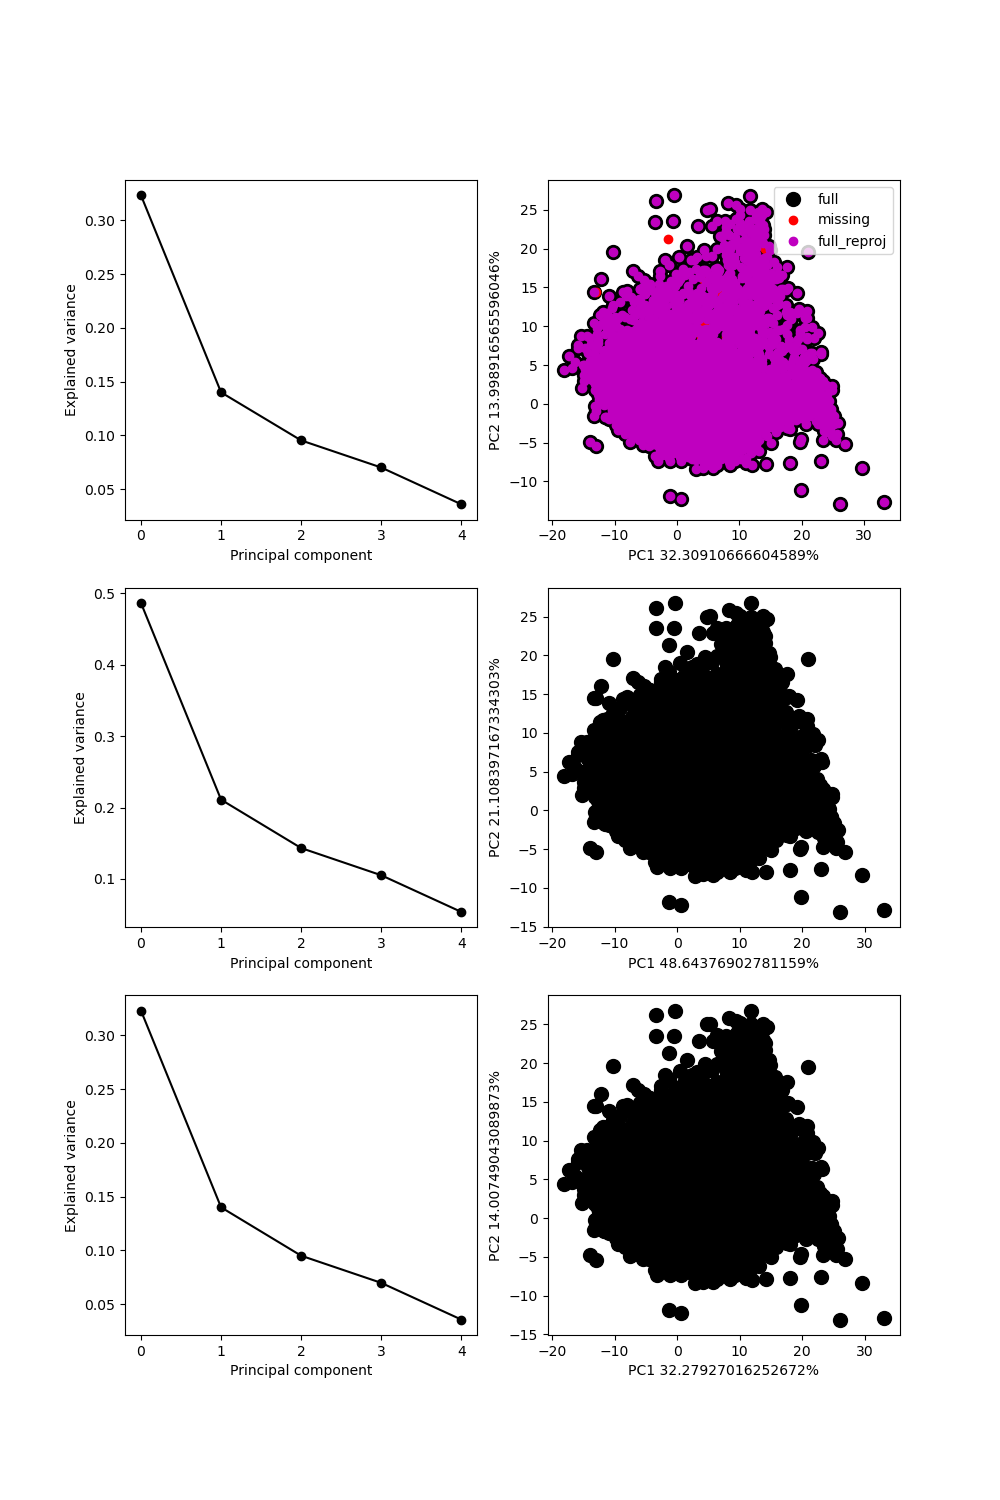

Full matrix shape (21838, 105)


,SEX,AGE,ALL_C_P_AV,ALL_C_QRS_AV,ALL_C_T_AV,ALL_C_PR_INT,ALL_C_PR_SEGM,ALL_C_ST_SEGM,ALL_C_QT_INT,ALL_C_TP_INT,...,V5_C_QT_INT,V5_C_TP_INT,V6_C_P_AV,V6_C_QRS_AV,V6_C_T_AV,V6_C_PR_INT,V6_C_PR_SEGM,V6_C_ST_SEGM,V6_C_QT_INT,V6_C_TP_INT
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,37.00000,84.888889,79.555556,196.888889,134.318056,52.007407,146.740741,412.722222,383.392857,...,427.111111,375.750000,84.888889,79.555556,196.888889,130.888889,46.000000,145.777778,422.222222,381.750000
2,0.0,24.00000,94.181818,92.800000,191.800000,137.175463,48.495370,78.383333,355.016667,318.279630,...,357.400000,318.200000,94.181818,92.800000,191.800000,135.000000,41.800000,68.000000,352.600000,320.200000
3,1.0,19.00000,101.555556,81.555556,187.333333,142.374074,49.655556,110.259259,381.481481,382.104167,...,382.222222,384.500000,101.555556,81.555556,187.333333,143.333333,41.777778,110.444444,379.333333,389.250000
4,0.0,18.00000,97.000000,81.090909,169.090909,153.800505,62.439394,85.727273,348.106061,223.867316,...,359.272727,209.400000,97.000000,81.090909,169.090909,154.000000,57.090909,100.363636,350.545455,221.272727
5,1.0,54.00000,94.888889,92.000000,196.750000,138.480489,46.062831,138.083333,416.791667,414.422619,...,443.250000,377.500000,94.888889,92.000000,196.750000,146.444444,51.555556,158.000000,446.500000,376.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21834,0.0,64.00000,105.555556,78.800000,181.000000,183.140212,84.820106,107.100000,370.283333,334.434524,...,375.200000,331.750000,105.555556,78.800000,181.000000,178.000000,72.444444,111.400000,371.200000,343.000000
21835,1.0,68.00000,68.400000,82.000000,208.666667,158.683333,74.144048,107.479167,388.416667,463.900595,...,392.500000,453.142857,68.400000,82.000000,208.666667,135.200000,66.800000,97.500000,388.000000,483.200000
21836,1.0,1212.62228,84.395745,80.812525,171.203238,132.290914,53.068416,140.903313,391.840979,417.353675,...,399.791790,409.224322,84.395745,80.812525,171.203238,130.601919,46.302285,146.516147,398.961284,411.671999


In [26]:
dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)

Removing  0 columns

 Initial Q2: 1933.968718229326
Initial quantification table:
[]
Monotonicity: (True, 10000)
Iteration 0 Q2= 1933.968718229326


<IPython.core.display.Javascript object>


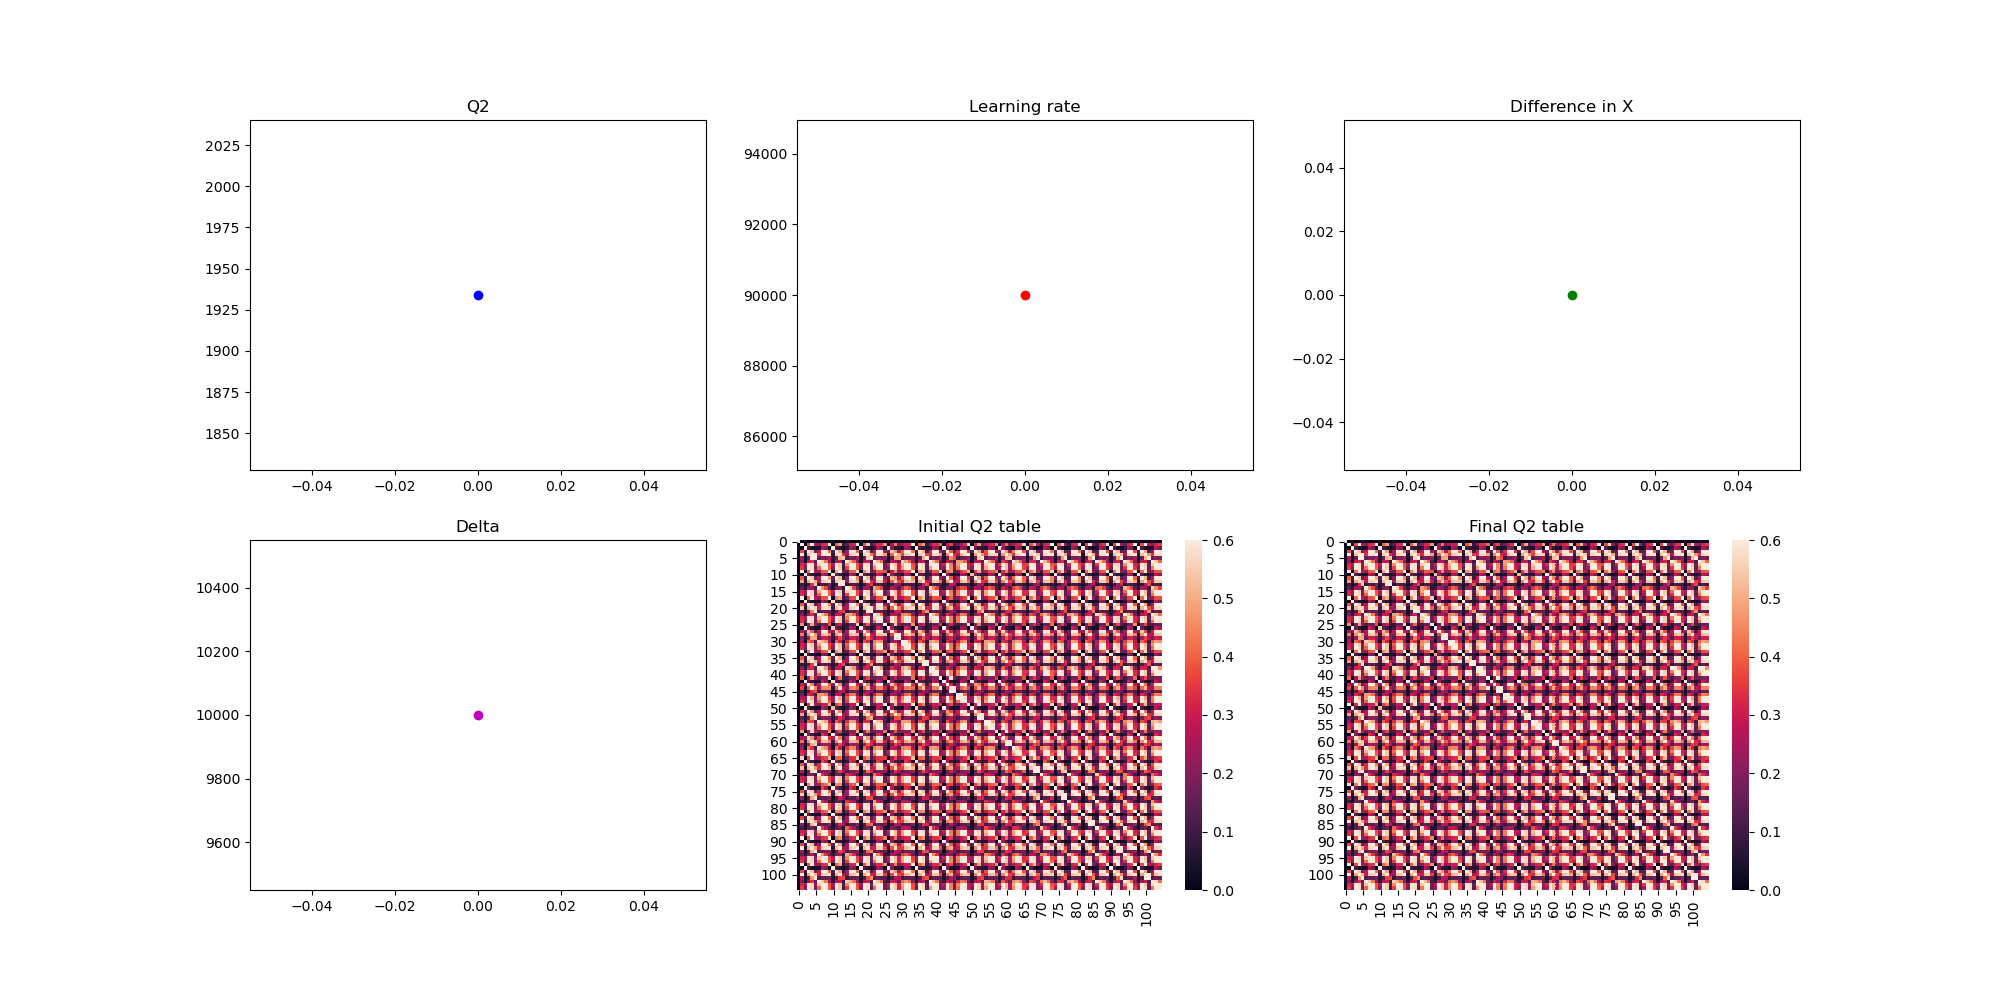


 Q2 after update: 1933.968718229321
Final quantification table:
[]
Monotonicity: (True, 10000)


In [27]:
df = remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df.columns[1:]]
X = df[df.columns[1:]].to_numpy()
X_orig_opt = X
X_before_scaling = X.copy()
X_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)

In [28]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = X_prep.to_numpy()
X_std = X_prep_std.to_numpy()

In [68]:
def do_PCA(X):
    reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:reduced_dimension], v, mean_val 

X_pca_norm, components_norm, mnval_norm = do_PCA(X_norm)
X_pca_std, components_std, mnval_std = do_PCA(X_std)
X_pca_opt, components_opt, mnval_opt = do_PCA(X_opt)

In [69]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended
'''
PTB_tree_norm = create_extended_tree(X_pca_norm, 50)
PTB_tree_std = create_extended_tree(X_pca_std, 50)
PTB_tree_opt = create_extended_tree(X_pca_opt, 50)
'''

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
12 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  21837  points and  12  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

4||50	34.6274	50	49	40	4	0	0	29.8586	29.7445	0.6383	0.6397	4.6036	0.1652	8.2602	413.01	0


123.9434  seconds elapsed
Removed 1 vertices and 1 edges
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 

In [70]:
'''
save_obj(PTB_tree_norm, "PTB_tree_norm")
save_obj(PTB_tree_std, "PTB_tree_std")
save_obj(PTB_tree_opt, "PTB_tree_opt")
'''

In [71]:
tree_norm = load_obj("PTB_tree_norm")
tree_std = load_obj("PTB_tree_std")
tree_opt = load_obj("PTB_tree_opt")

In [72]:
X_orig_imputer = SimpleImputer(strategy="median").fit_transform(dataset)

In [73]:
def tree_visualization_by_branches(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

<IPython.core.display.Javascript object>


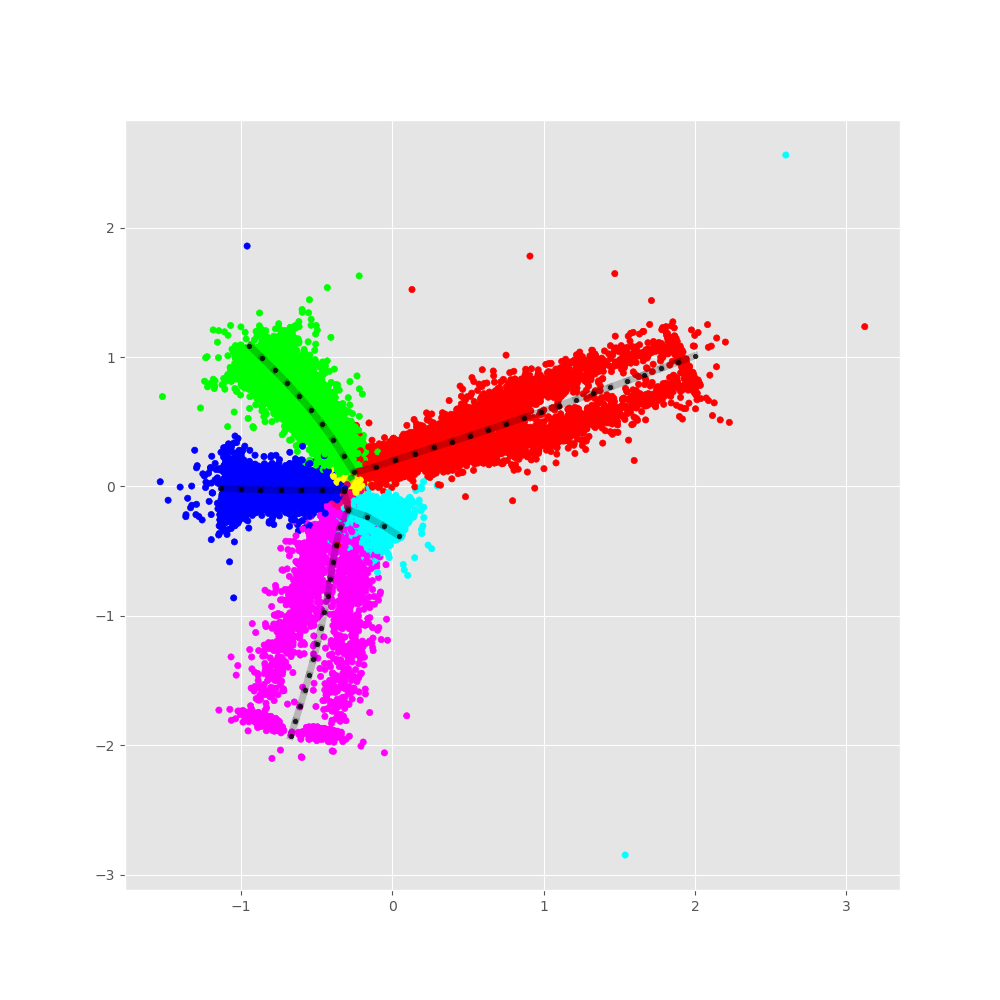

In [74]:
fig = plt.figure(figsize=(10, 10))
tree_visualization(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm)
plt.show()

<IPython.core.display.Javascript object>


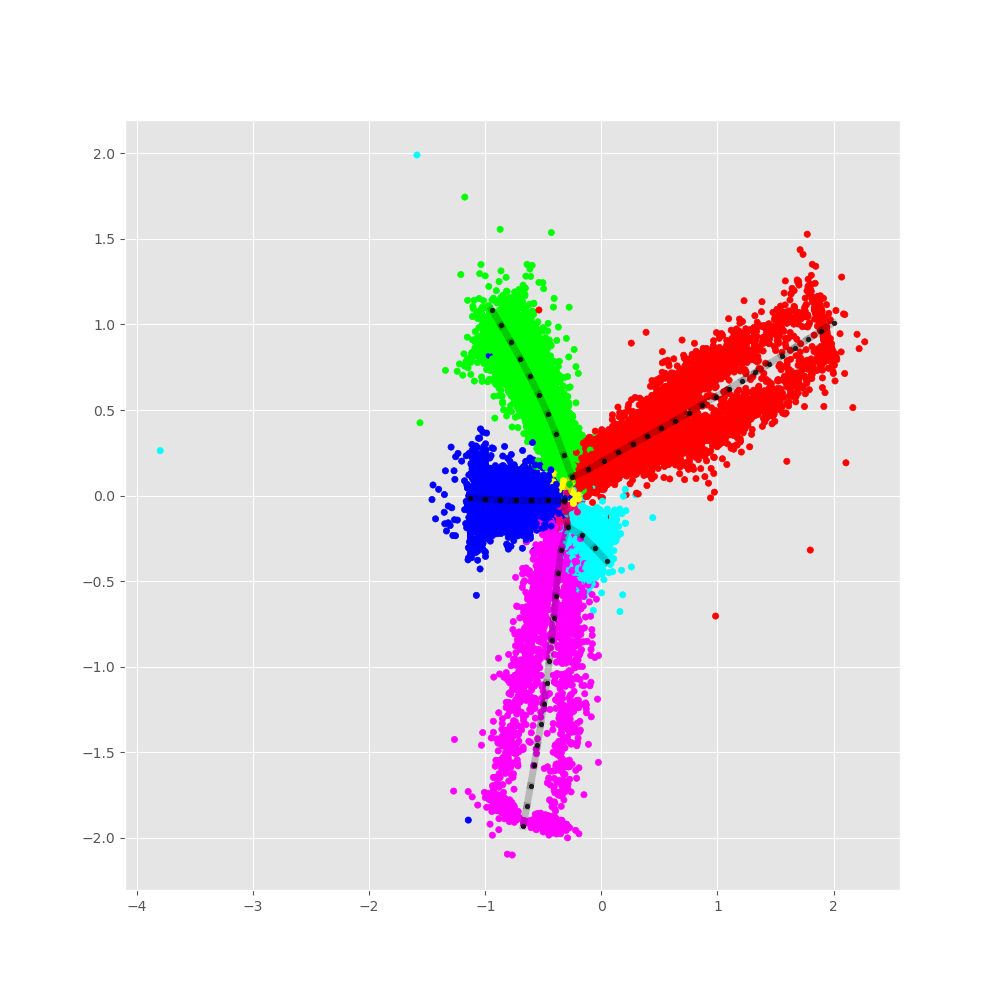

In [75]:
fig = plt.figure(figsize=(10, 10))
tree_visualization(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std)
plt.show()

<IPython.core.display.Javascript object>


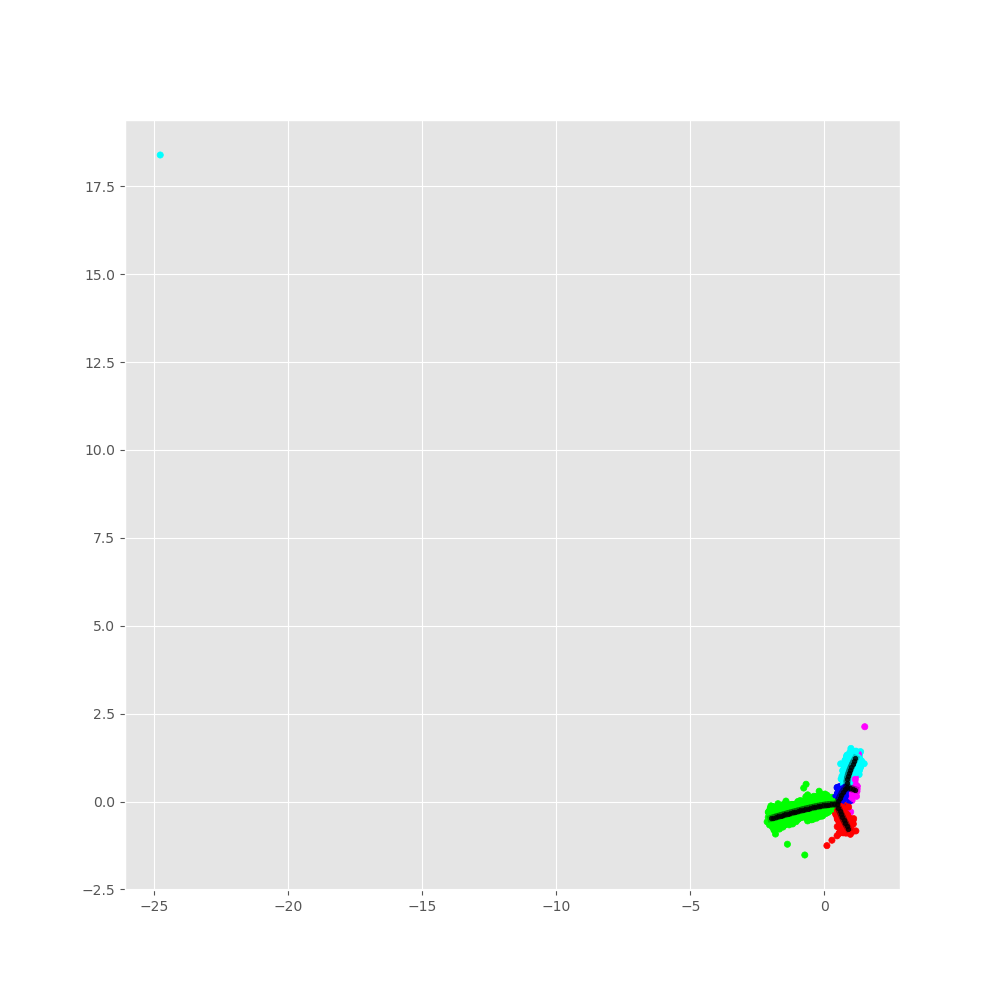

In [76]:
fig = plt.figure(figsize=(10, 10))
tree_visualization(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt)
plt.show()

In [77]:
fig = plt.figure(figsize=(8, 8))
feature = 'AGE'
variable_names = [str(s) for s in dataset.columns[1:]]
visualize_eltree_with_data(tree_norm, X_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                          Color_by_feature=feature, Feature_Edge_Width=feature,
                           Invert_Edge_Value=True,Min_Edge_Width=10,Max_Edge_Width=50,
                           Visualize_Edge_Width_AsNodeCoordinates=True,cmap='rainbow')
plt.show()

<IPython.core.display.Javascript object>

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 106 is different from 12)

In [79]:
X_pca_norm.shape, X_orig_imputer.shape, components_norm.shape, mnval_norm.shape, np.array(variable_names).shape

((21837, 12), (21837, 106), (106, 106), (106,), (105,))

In [67]:
X.shape[1]

105

In [66]:
X_orig_imputer[5]

array([  1.        ,  18.        ,  97.        ,  81.09090909,
       169.09090909, 153.80050505,  62.43939394,  85.72727273,
       348.10606061, 223.86731602,  94.66666667,  85.27272727,
       191.27272727, 154.        ,  59.09090909,  73.63636364,
       350.18181818, 222.90909091, 106.        ,  85.81818182,
       176.18181818, 160.        ,  54.        ,  92.90909091,
       354.90909091, 208.        ,  87.33333333,  77.63636364,
       159.09090909, 162.18181818,  75.27272727,  94.36363636,
       331.09090909, 232.72727273,  99.83333333,  86.54545455,
       182.90909091, 163.45454545,  63.63636364,  73.81818182,
       343.27272727, 220.36363636,  68.66666667,  75.63636364,
       179.45454545, 141.09090909,  75.09090909,  85.45454545,
       340.54545455, 242.54545455, 100.5       ,  84.36363636,
       125.81818182, 160.18181818,  59.27272727, 126.18181818,
       336.36363636, 230.36363636,  76.        ,  85.81818182,
       141.45454545, 148.33333333,  74.        ,  99.63